In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("C:/Users/anura/Downloads/titanic/train.csv")
test = pd.read_csv("C:/Users/anura/Downloads/titanic/test.csv")
gender_submission = pd.read_csv("C:/Users/anura/Downloads/titanic/gender_submission.csv")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [19]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [21]:
print(gender_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


In [23]:
print(train.isnull().sum())
print(test.isnull().sum())
print(gender_submission.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Survived       0
dtype: int64


In [31]:
print(train['Cabin'].value_counts().head(1))

Cabin
B96 B98    4
Name: count, dtype: int64


In [39]:
print((train['Age'].mean()))

29.69911764705882


In [41]:
print(test['Cabin'].value_counts().head(1))

Cabin
B57 B59 B63 B66    3
Name: count, dtype: int64


In [43]:
print((test['Age'].mean()))

30.272590361445783


In [61]:
train['Cabin'].fillna("B96" , inplace = True)
train["Age"].fillna("30",inplace = True)
train["Embarked"].fillna(inplace = True,method = "ffill")
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\anura\AppData\Local\Temp\ipykernel_8000\2092963476.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Embarked"].fillna(inplace = True,method = "ffill")
C:\Users\anura\AppData\Local\Temp\ipykernel_8000\2092963476.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train["Embarked"].fillna(inplace = True,method = "ffill")


In [65]:
test['Age'].fillna(30,inplace = True)
test["Cabin"].fillna("B66",inplace = True)
test["Fare"].fillna(inplace = True,method = "ffill")
print(test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\anura\AppData\Local\Temp\ipykernel_8000\433545524.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Fare"].fillna(inplace = True,method = "ffill")
C:\Users\anura\AppData\Local\Temp\ipykernel_8000\433545524.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test["Fare"].fillna(inplace = True,method = "ffill")


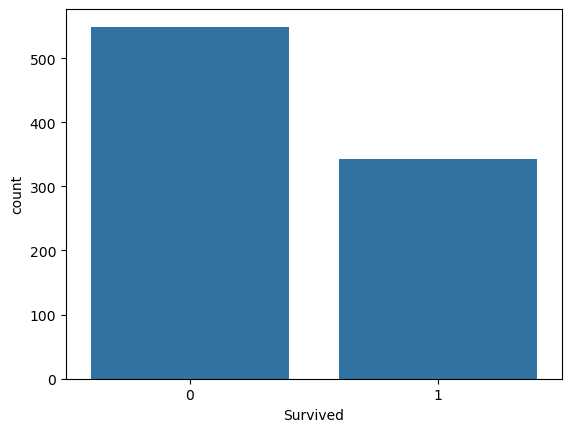

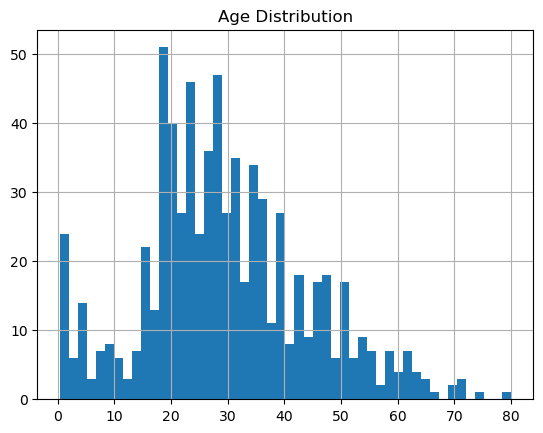

In [75]:
sns.countplot(x='Survived', data=train)
plt.show()

train['Age'].hist(bins=50)
plt.title('Age Distribution')
plt.show()


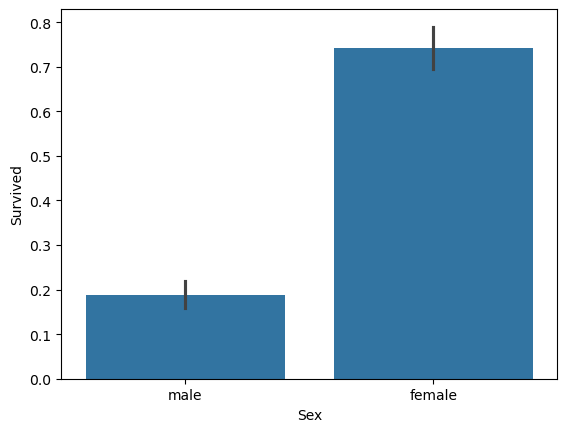

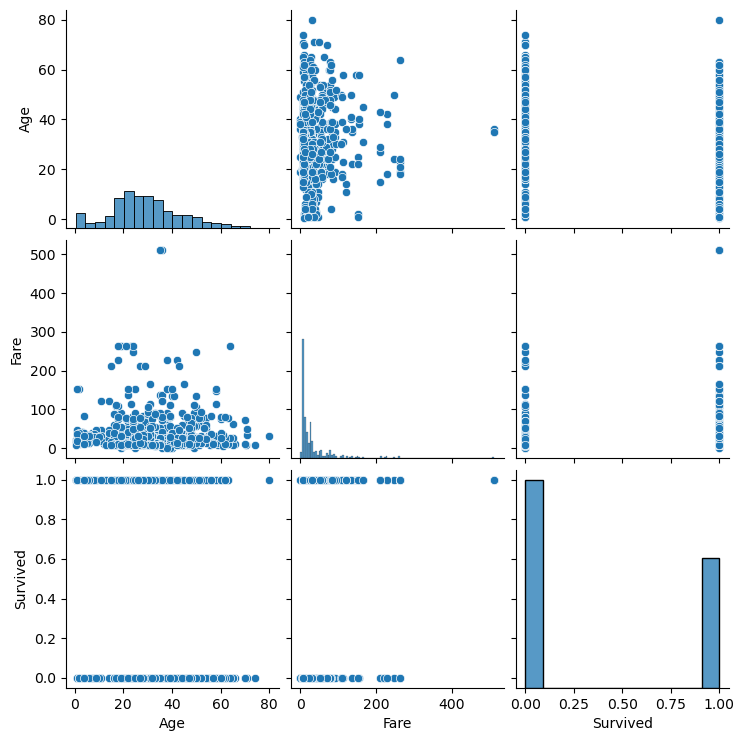

In [81]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.show()
sns.pairplot(train[['Age', 'Fare', 'Survived']])
plt.show()

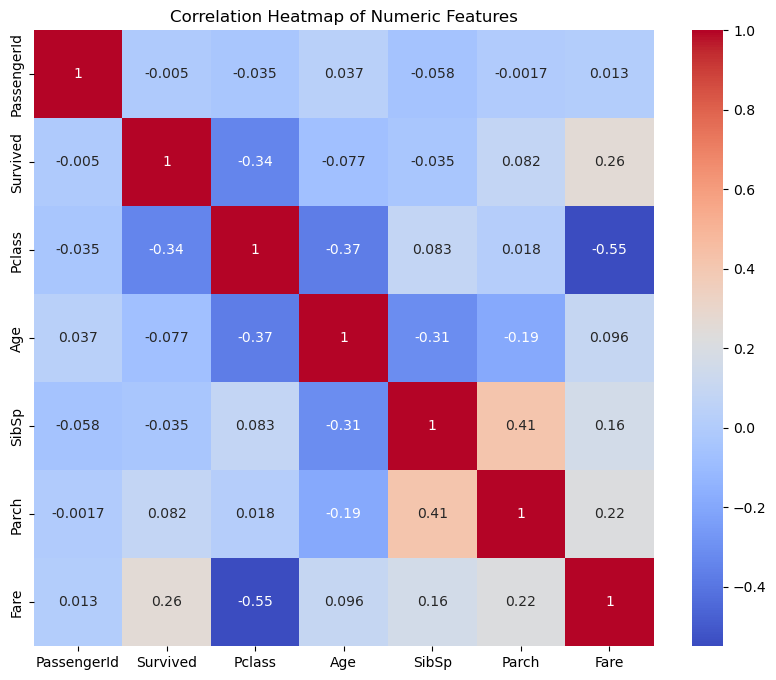

In [89]:
numeric_data = train.select_dtypes(include=['number'])

# Create correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

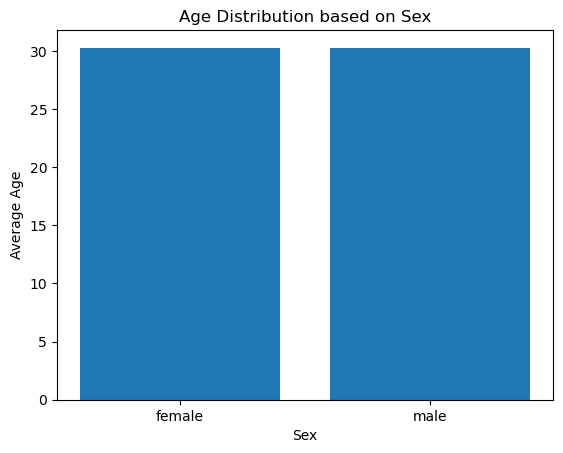

In [99]:
age_by_sex = test.groupby('Sex')['Age'].mean()

# Create the bar chart
plt.bar(age_by_sex.index, age_by_sex.values)

# Add title and labels
plt.title("Age Distribution based on Sex")
plt.xlabel('Sex')
plt.ylabel("Average Age")

# Display the plot
plt.show()

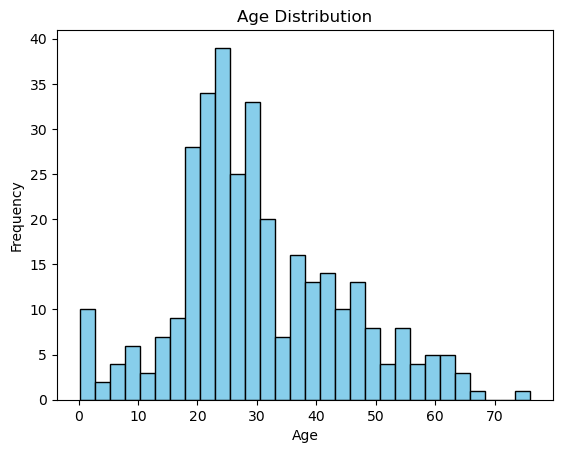

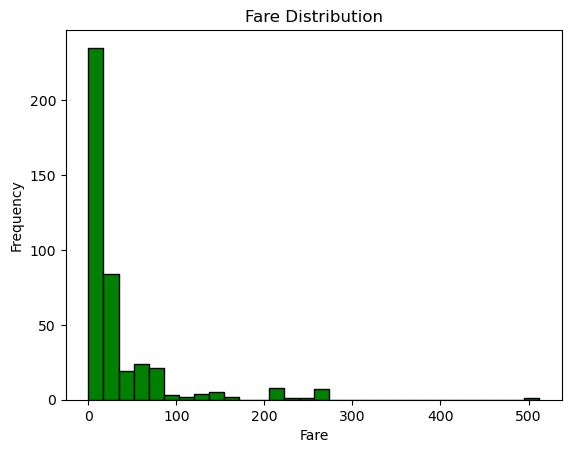

In [109]:
plt.hist(test['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(test['Fare'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


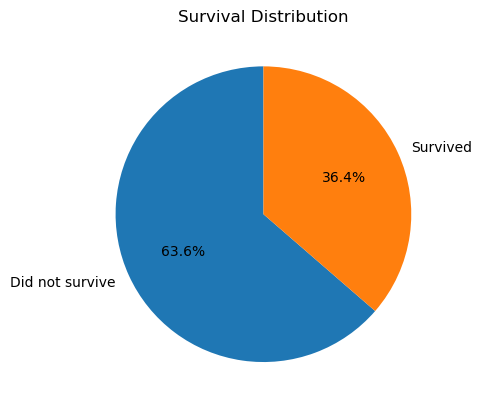

In [113]:
survived_counts = gender_submission['Survived'].value_counts()

# Plot a pie chart
plt.pie(survived_counts, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.show()